<a href="https://colab.research.google.com/github/Areeb-07/WiDS-IPL/blob/main/DL_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import math,os
from numpy.random import choice
from time import time
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import linear_model

# Getting Data

In [ ]:
matches = pd.read_csv('/content/drive/My Drive/matches.csv')
deliveries = pd.read_csv('/content/drive/My Drive/deliveries.csv')

# Data Pre-processing

### A look at the datasets 

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


### Filling null values in 'city' column based on 'venue' values

In [ ]:
matches[(matches['city'].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
matches[(matches["venue"]=="Dubai International Cricket Stadium")]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
matches.loc[(matches.venue == 'Dubai International Cricket Stadium'),'city']='Dubai'

In [ ]:
matches[(matches["venue"]=="Dubai International Cricket Stadium")]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


### Replacing two names for the same team

In [ ]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
matches.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
deliveries.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
deliveries.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [ ]:
matches.loc[(matches.team1 == 'Rising Pune Supergiants'),'team1']='Rising Pune Supergiant'
matches.loc[(matches.team2 == 'Rising Pune Supergiants'),'team2']='Rising Pune Supergiant'
matches.loc[(matches.toss_winner == 'Rising Pune Supergiants'),'toss_winner']='Rising Pune Supergiant'
matches.loc[(matches.winner == 'Rising Pune Supergiants'),'winner']='Rising Pune Supergiant'
deliveries.loc[(deliveries.batting_team == 'Rising Pune Supergiants'),'batting_team']='Rising Pune Supergiant'
deliveries.loc[(deliveries.bowling_team == 'Rising Pune Supergiants'),'bowling_team']='Rising Pune Supergiant'
matches.loc[(matches.team1 == 'Delhi Daredevils'),'team1']='Delhi Capitals'
matches.loc[(matches.team2 == 'Delhi Daredevils'),'team2']='Delhi Capitals'
matches.loc[(matches.toss_winner == 'Delhi Daredevils'),'toss_winner']='Delhi Capitals'
matches.loc[(matches.winner == 'Delhi Daredevils'),'winner']='Delhi Capitals'
deliveries.loc[(deliveries.batting_team == 'Delhi Daredevils'),'batting_team']='Delhi Capitals'
deliveries.loc[(deliveries.bowling_team == 'Delhi Daredevils'),'bowling_team']='Delhi Capitals'

In [ ]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
matches.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', nan],
      dtype=object)

In [ ]:
deliveries.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
deliveries.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors'],
      dtype=object)

### Changing column 'date' to type datetime

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])

### Dropping insignificant columns with very large number of missing values

In [ ]:
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
matches.drop(['umpire3'], axis = 1, inplace = True)

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
deliveries.drop(['player_dismissed', 'dismissal_kind','fielder'], axis = 1, inplace = True)

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


### Dropping rows with missing winner values

In [ ]:
matches.drop(matches[matches['winner'].isnull()].index, inplace = True)

### Filling NaN values

In [ ]:
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [ ]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

In [ ]:
str_cols = matches.columns[matches.dtypes==object]
matches[str_cols] = matches[str_cols].fillna('.')

In [ ]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

### Concatinating the two datasets

In [ ]:
matches.rename(columns={'id':'match_id'},inplace=True)

In [ ]:
data = pd.merge(left=matches, right=deliveries, on='match_id', how='right')
print(data.shape)
data.head()

(179078, 34)


,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
data.isnull().sum()

match_id             0
season             372
city               372
date               372
team1              372
team2              372
toss_winner        372
toss_decision      372
result             372
dl_applied         372
winner             372
win_by_runs        372
win_by_wickets     372
player_of_match    372
venue              372
umpire1            372
umpire2            372
inning               0
batting_team         0
bowling_team         0
over                 0
ball                 0
batsman              0
non_striker          0
bowler               0
is_super_over        0
wide_runs            0
bye_runs             0
legbye_runs          0
noball_runs          0
penalty_runs         0
batsman_runs         0
extra_runs           0
total_runs           0
dtype: int64

### Dropping rows with missing winner values

In [ ]:
data.drop(data[data['winner'].isnull()].index, inplace = True)

In [ ]:
data.isnull().sum()

match_id           0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batsman            0
non_striker        0
bowler             0
is_super_over      0
wide_runs          0
bye_runs           0
legbye_runs        0
noball_runs        0
penalty_runs       0
batsman_runs       0
extra_runs         0
total_runs         0
dtype: int64

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178706 entries, 0 to 178705
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   match_id         178706 non-null  int64         
 1   season           178706 non-null  float64       
 2   city             178706 non-null  object        
 3   date             178706 non-null  datetime64[ns]
 4   team1            178706 non-null  object        
 5   team2            178706 non-null  object        
 6   toss_winner      178706 non-null  object        
 7   toss_decision    178706 non-null  object        
 8   result           178706 non-null  object        
 9   dl_applied       178706 non-null  float64       
 10  winner           178706 non-null  object        
 11  win_by_runs      178706 non-null  float64       
 12  win_by_wickets   178706 non-null  float64       
 13  player_of_match  178706 non-null  object        
 14  venue            178

### Features Engineering

In [ ]:
regression=data.copy()
df=regression.filter(['match_id','venue','inning','batting_team','bowling_team','batsman','bowler','over','ball','total_runs'],axis=1)
df

,match_id,venue,inning,batting_team,bowling_team,batsman,bowler,over,ball,total_runs
0,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,1,0
1,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,2,0
2,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,3,4
3,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,4,0
4,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,5,2
...,...,...,...,...,...,...,...,...,...,...
178701,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SL Malinga,20,2,1
178702,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,3,2
178703,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,4,1
178704,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SN Thakur,SL Malinga,20,5,2


In [ ]:
dfs=[]
for i in df['match_id'].unique():
  for j in range(1,3):
    d=df[(df['match_id']==i) & (df['inning']==j)]
    s=d['total_runs'].sum()
    d['final_score']=s
    current=0
    d['current_score']=0
    for ind in d.index:
      current+=d['total_runs'][ind]
      d['current_score'][ind]=current
    data2 = d.copy()
    data2 = data2.groupby(by=['over']).sum()['total_runs'].reset_index()
    data3 = pd.merge(left=d, right=data2, on='over', how='right')
    dfs.append(data3)
final=pd.concat(dfs)
final

,match_id,venue,inning,batting_team,bowling_team,batsman,bowler,over,ball,total_runs_x,final_score,current_score,total_runs_y
0,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,1,0,207,0,7
1,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,2,0,207,0,7
2,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,3,4,207,4,7
3,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,4,0,207,4,7
4,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,5,2,207,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SL Malinga,20,2,1,157,152,7
120,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,3,2,157,154,7
121,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,4,1,157,155,7
122,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SN Thakur,SL Malinga,20,5,2,157,157,7


The column 'final_score' is the target variable

The column 'current_score' gives the current score

The column 'total_runs_y' gives the total runs in scored in that over

'total_runs_y' will be renamed to 'total_over_runs'

### Creating final dataset

In [ ]:
final.reset_index(drop=True,inplace=True)
final

,match_id,venue,inning,batting_team,bowling_team,batsman,bowler,over,ball,total_runs_x,final_score,current_score,total_runs_y
0,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,1,0,207,0,7
1,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,2,0,207,0,7
2,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,3,4,207,4,7
3,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,4,0,207,4,7
4,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,5,2,207,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178605,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SL Malinga,20,2,1,157,152,7
178606,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,3,2,157,154,7
178607,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,4,1,157,155,7
178608,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SN Thakur,SL Malinga,20,5,2,157,157,7


In [ ]:
final.rename({'total_runs_y':'total_over_runs'}, axis=1, inplace=True)
final

,match_id,venue,inning,batting_team,bowling_team,batsman,bowler,over,ball,total_runs_x,final_score,current_score,total_over_runs
0,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,1,0,207,0,7
1,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,2,0,207,0,7
2,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,3,4,207,4,7
3,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,4,0,207,4,7
4,1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,1,5,2,207,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178605,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SL Malinga,20,2,1,157,152,7
178606,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,3,2,157,154,7
178607,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,20,4,1,157,155,7
178608,11415,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SN Thakur,SL Malinga,20,5,2,157,157,7


In [ ]:
final.drop(['match_id','over','ball','total_runs_x'], axis = 1, inplace = True)
final

,venue,inning,batting_team,bowling_team,batsman,bowler,final_score,current_score,total_over_runs
0,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,207,0,7
1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,207,0,7
2,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,207,4,7
3,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,207,4,7
4,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,207,6,7
...,...,...,...,...,...,...,...,...,...
178605,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SL Malinga,157,152,7
178606,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,157,154,7
178607,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SR Watson,SL Malinga,157,155,7
178608,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,SN Thakur,SL Malinga,157,157,7


In [ ]:
columns=list(final.columns.values)
columns

['venue',
 'inning',
 'batting_team',
 'bowling_team',
 'batsman',
 'bowler',
 'final_score',
 'current_score',
 'total_over_runs']

In [ ]:
columns[6],columns[8]=columns[8],columns[6]
columns

['venue',
 'inning',
 'batting_team',
 'bowling_team',
 'batsman',
 'bowler',
 'total_over_runs',
 'current_score',
 'final_score']

In [ ]:
final_data=final[columns] # Final dataset for regression
final_data.head()

,venue,inning,batting_team,bowling_team,batsman,bowler,total_over_runs,current_score,final_score
0,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,7,0,207
1,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,7,0,207
2,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,7,4,207
3,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,7,4,207
4,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,7,6,207


### Encoding non-numerical values

In [ ]:
#encoding
encoder=preprocessing.LabelEncoder()
final_data["batting_team"]=encoder.fit_transform(final_data["batting_team"])
final_data["bowling_team"]=encoder.fit_transform(final_data["bowling_team"])
final_data["batsman"]=encoder.fit_transform(final_data["batsman"])
final_data["bowler"]=encoder.fit_transform(final_data["bowler"])
final_data["venue"]=encoder.fit_transform(final_data["venue"])
final_data

,venue,inning,batting_team,bowling_team,batsman,bowler,total_over_runs,current_score,final_score
0,28,1,12,11,112,378,7,0,207
1,28,1,12,11,112,378,7,0,207
2,28,1,12,11,112,378,7,4,207
3,28,1,12,11,112,378,7,4,207
4,28,1,12,11,112,378,7,6,207
...,...,...,...,...,...,...,...,...,...
178605,29,2,0,7,361,340,7,152,157
178606,29,2,0,7,444,340,7,154,157
178607,29,2,0,7,444,340,7,155,157
178608,29,2,0,7,437,340,7,157,157


## Loss Function

In [ ]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

It calculates the accuracy based on whether the predicted final score is in +-10 range of the the actual final score

# Neural Network

### Preparing train, test and validate data

In [100]:
!gdown --id  1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT

Downloading...
From: https://drive.google.com/uc?id=1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT
To: /content/ipl.csv
100% 9.48M/9.48M [00:00<00:00, 44.3MB/s]


In [101]:
dataset3 = pd.read_csv("/content/ipl.csv")
dataset = dataset3.copy()
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset = dataset.iloc[:,[7,8,9,12,13,14]]
dataset_size = len(dataset)
split = int(np.floor((0.05) * dataset_size))
indices = list(range(len(dataset)))
df_train = dataset.iloc[split:,:]
df_test = dataset.iloc[:split,:]

In [102]:
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()
df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

,0,1,2,3,4,label
0,0.188249,0.290543,0.263942,0.552784,-0.357746,0.533333
1,-0.815000,-0.701176,-0.739831,-0.544341,-0.357746,0.593333
2,0.966278,0.290543,0.990812,1.600040,1.031283,0.533333
3,0.618212,0.290543,0.800442,1.550171,-0.820756,0.483333
4,-1.101642,-0.205316,-1.155185,-0.544341,-0.635552,0.526667


In [103]:
sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()
df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

,0,1,2,3,4,label
0,-1.578651,-1.233484,-1.737683,-1.256912,-0.836997,0.486667
1,-0.835554,0.277067,-0.801593,-0.333220,-0.836997,0.620000
2,-1.145178,-0.226450,-1.013538,-1.013835,-0.464323,0.500000
3,0.650639,0.277067,0.381766,-0.867989,-0.557491,0.623333
4,-0.752988,-1.233484,-1.031200,-0.090143,0.560531,0.586667


Size of training data : 72214
Size of test data : 3800


In [104]:
class CustomDatasetFromCSV(Dataset):
    def __init__(self, data, transform=None):
        self.data = data 
        self.transforms = transforms
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        target = self.data.iloc[index,-1]
        data_val = self.data.iloc[index,:-1]
        target = torch.tensor(target,dtype=torch.float32)
        data_val = torch.tensor(data_val,dtype=torch.float32) 
        return data_val,target

    def __len__(self):
        return len(self.data)


dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.075
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size,drop_last=True)

## Defining the model

In [105]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, H6, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.norm1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.norm2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.norm3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.norm4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.linear6 = nn.Linear(H5, H6)
        self.linear7 = nn.Linear(H6, D_out)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.leaky_relu(self.norm1(self.linear1(x)))
        x = F.leaky_relu(self.norm2(self.linear2(x)))
        x = F.leaky_relu(self.norm3(self.linear3(x)))
        x = F.leaky_relu(self.norm4(self.linear4(x)))
        x = F.leaky_relu(self.linear5(x))
        x = F.leaky_relu(self.linear6(x))
        x = self.linear7(x)
        return x.view(batch_size)          

In [106]:
D_in, H1, H2, H3, H4, H5, H6, D_out = 5, 64, 128, 256, 128, 128, 64, 1

In [107]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

521
42
29


## Model Summary

In [108]:
model = mymodel(D_in, H1, H2, H3, H4, H5, H6, D_out)
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')

mymodel(
  (linear1): Linear(in_features=5, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=256, bias=True)
  (norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=1, bias=True)
)


## Estimate of trainable parameters

In [109]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 100,609 trainable parameters


## Training the model

In [113]:
def r2(y_true,y_pred):
    return roundup(r2_score(y_true,y_pred))
def roundup(a, digits=4):
    n = 10**-digits
    return round(math.ceil(a / n) * n, digits)

In [114]:
%%time
step = 0
epochs = 200
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
validation_acc_l = []

for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_r2 = 0
    train_r2 = 0


    for inputs, labels in train_loader:

        # Clear the gradients of all optimized tensors
        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels = inputs, labels        
        # Forward pass
        model.train()
        outputs = model.forward(inputs)
        predicted = outputs.data
        train_loss = criterion(outputs, labels)
        train_r2_ =  r2(outputs.detach().cpu().numpy(), labels.detach().cpu().numpy())
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()  
        train_r2 +=  train_r2_
    validation_correct = 0
    validation_total = 0

        
    with torch.no_grad():    
            # Iterate over the entire validation dataset
            for input_images2, labels2 in validation_loader:
                
                # Enable CUDA: use GPUs for model computation
                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                predicted2 = outputs2.data
                valid_r2_ =  r2(outputs2.detach().cpu().numpy(), labels2.detach().cpu().numpy())
                validation_total += labels2.size(0)
                validation_correct += custom_accuracy(labels2,predicted2,10/300)  
                valid_loss = criterion(outputs2, labels2)
                running_loss_valid += valid_loss.item()  
                validation_r2 +=  valid_r2_

    val_acc = validation_correct / validation_total

    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train R2: {:.4f}".format(train_r2/len(train_loader)),
          "| Val R2: {:.4f}".format(validation_r2/len(validation_loader)),
          "| Val Acc: {:.4f} %".format(val_acc*100))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_r2/len(train_loader))
    val_acc_l.append(validation_r2/len(validation_loader))
    validation_acc_l.append(val_acc*100)

          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/200...  | Train Loss: 0.0061 | Val Loss: 0.0048 | Train R2: -0.3493 | Val R2: 0.1333 | Val Acc: 35.1824 %
Epoch: 2/200...  | Train Loss: 0.0048 | Val Loss: 0.0051 | Train R2: 0.0776 | Val R2: 0.1335 | Val Acc: 33.0171 %
Epoch: 3/200...  | Train Loss: 0.0046 | Val Loss: 0.0046 | Train R2: 0.0993 | Val R2: 0.1394 | Val Acc: 35.9381 %
Epoch: 4/200...  | Train Loss: 0.0046 | Val Loss: 0.0047 | Train R2: 0.1149 | Val R2: 0.0822 | Val Acc: 34.8191 %
Epoch: 5/200...  | Train Loss: 0.0045 | Val Loss: 0.0050 | Train R2: 0.1257 | Val R2: 0.1194 | Val Acc: 35.0371 %
Epoch: 6/200...  | Train Loss: 0.0045 | Val Loss: 0.0045 | Train R2: 0.1323 | Val R2: 0.1764 | Val Acc: 36.8827 %
Epoch: 7/200...  | Train Loss: 0.0044 | Val Loss: 0.0045 | Train R2: 0.1395 | Val R2: 0.1692 | Val Acc: 36.4031 %
Epoch: 8/200...  | Train Loss: 0.0044 | Val Loss: 0.0045 | Train R2: 0.1554 | Val R2: 0.0705 | Val Acc: 37.1588 %
Epoch: 9/200...  | Train Loss: 0.0044 | Val Loss: 0.0044 | Train R2: 0.1551 | Val R2: 0

## Plots for training and validation loss and accuracy

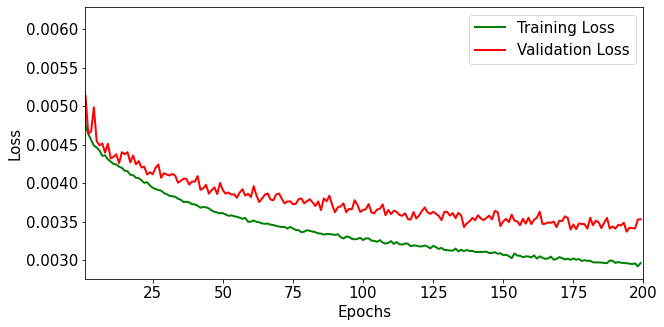

In [115]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,200)
plt.legend()
plt.show()

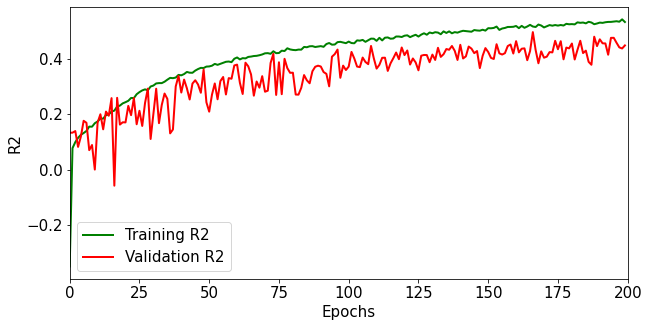

In [116]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.legend()
plt.show()

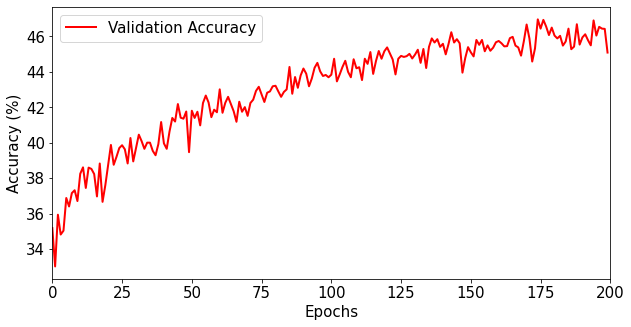

In [117]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.plot(validation_acc_l[0:],c='r',label="Validation Accuracy",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0,200)
plt.legend()
plt.show()

## Final test accuracy

In [118]:
with torch.no_grad(): 
      model.eval()  
      test_total=0 
      test_correct=0
      for input_images3, labels3 in test_loader:

          if torch.cuda.is_available():
              input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
          
          outputs3= model.forward(input_images3)
          predicted3 = outputs3.data
          test_r2_ =  r2(outputs3.detach().cpu().numpy(), labels3.detach().cpu().numpy())
          test_total += labels3.size(0)
          test_correct += custom_accuracy(labels3,predicted2,40/300) 
          test_r2_ +=  test_r2_

In [119]:
test_acc = test_correct/test_total*100
test_r2 = test_r2_/test_total
print(test_acc,test_r2)

54.784314385775865 0.00032683189655172417
